In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib as mpl

In [29]:
#Downloading the dataset overall: 

#Selecting a year and s_rho layer (-1 equals surface layer)
year = 2024
s_depth_layer = -1
file = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{year}/norkyst800-{year}0101.nc'

#Download of the dataset
ds = xr.open_dataset(file).isel(s_rho = (s_depth_layer))

#To reduce the magnitude of the file by not including all variables use ds.drop_vars(the variables you whish to exclude)
#For an example dropping the wind variables as the first plots are made with temperature and salinity
ds.drop_vars(["Uwind_eastward", "Vwind_northward", "ubar_eastward", "vbar_northward", "u_eastward", "v_northward"])

#To specify which values we want to be read in to our code, we can specify certain values for both time, Y, X and s_w in the isel as a list!
#Eg. with a specific variable temperature
ny_temp = ds["temperature"].isel(time = 0, Y = 0, X = 0)
print(ny_temp)

<xarray.DataArray 'temperature' ()> Size: 4B
[1 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2024-01-01
    s_rho    float64 8B -0.004904
    X        float64 8B 0.0
    Y        float64 8B 0.0
    lon      float64 8B ...
    lat      float64 8B ...
Attributes:
    units:                  Celsius
    grid:                   grid
    location:               face
    field:                  temperature, scalar, series
    grid_mapping:           projection_stere
    long_name:              Sea water potential temperature
    standard_name:          sea_water_potential_temperature
    coverage_content_type:  modelResult
    time:                   time


In [30]:
#Checking dataset and necessary variables + dimensions for output formula
ds.head()


<xarray.Dataset> Size: 10kB
Dimensions:           (time: 5, Y: 5, X: 5, s_w: 5)
Coordinates:
  * time              (time) datetime64[ns] 40B 2024-01-01 ... 2024-01-01T04:...
    s_rho             float64 8B -0.004904
  * X                 (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y                 (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * s_w               (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
    lon               (Y, X) float64 200B ...
    lat               (Y, X) float64 200B ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 500B ...
    Vwind_northward   (time, Y, X) float32 500B ...
    zeta              (time, Y, X) float32 500B ...
    ubar_eastward     (time, Y, X) float32 500B ...
    vbar_northward    (time, Y, X) float32 500B ...
    u_eastward        (time, Y, X) float32 500B ...
    ...                ...
    hc                float64 8B ...
    Cs_r              float64 8B ...
    Cs_w              (s_w) float64 40B ...
    h                 (Y, X) float32 100B ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      f36dd872-f506-4ce2-a3ef-884f35a19db7
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

In [31]:
#Creating a function for temperature and salinity
#They both need indices indicating: Time; Depth; Y; X. Depth is already read in by the use of isel, and is not repeatet as an index within the function
def plotting_output(longitude, latitude, variable, title): #,variable_name):
    plt.pcolormesh(longitude, latitude, variable, shading = 'auto')
    plt.xlabel("Longitude [$ \circ $]")
    plt.ylabel("Latitude [$ \circ $]")
    plt.title(title)
    #plt.colorbar(variable_name)
    return plotting_output

In [32]:
#Creating variable names for interesting values to plot:
temperature = ds["temperature"]
salinity = ds["salinity"]

lon = ds["lon"]
lat = ds["lat"]

In [33]:
#looking at the data
print(temperature)


<xarray.DataArray 'temperature' (time: 24, Y: 1148, X: 2747)> Size: 303MB
[75685344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 192B 2024-01-01 ... 2024-01-01T23:00:00
    s_rho    float64 8B -0.004904
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    lon      (Y, X) float64 25MB ...
    lat      (Y, X) float64 25MB ...
Attributes:
    units:                  Celsius
    grid:                   grid
    location:               face
    field:                  temperature, scalar, series
    grid_mapping:           projection_stere
    long_name:              Sea water potential temperature
    standard_name:          sea_water_potential_temperature
    coverage_content_type:  modelResult
    time:                   time


In [34]:
print(salinity)

<xarray.DataArray 'salinity' (time: 24, Y: 1148, X: 2747)> Size: 303MB
[75685344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 192B 2024-01-01 ... 2024-01-01T23:00:00
    s_rho    float64 8B -0.004904
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    lon      (Y, X) float64 25MB ...
    lat      (Y, X) float64 25MB ...
Attributes:
    grid:                   grid
    location:               face
    field:                  salinity, scalar, series
    grid_mapping:           projection_stere
    long_name:              Sea water salinity
    standard_name:          sea_water_salinity
    coverage_content_type:  modelResult
    units:                  1
    time:                   time


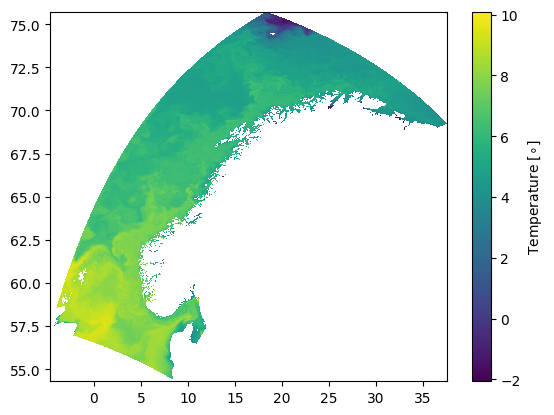

In [35]:
#Basic map - reads in the longitude, latitude, temperature for time = 0, and all of X and Y coordinates
plt.pcolormesh(ds.lon,ds.lat,temperature[0,:,:], shading="auto")
plt.colorbar(label = "Temperature [$\circ$]")


<function __main__.plotting_output(longitude, latitude, variable, title)>

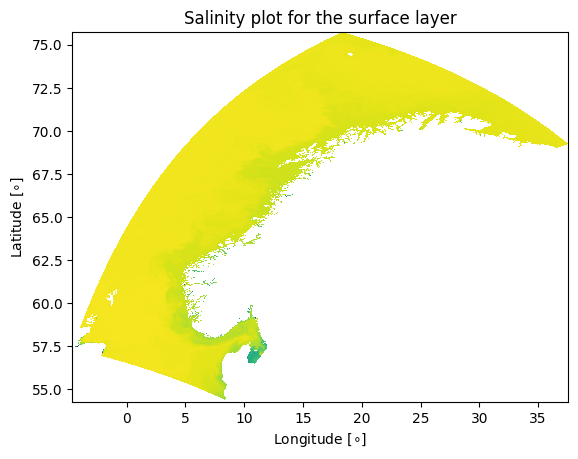

In [36]:
#Checking if plotting_output function works
plotting_output(ds.lon, ds.lat, temperature[0,:,:], title="Temperature plot for the surface layer")

#Checking if plotting_output function works
plotting_output(ds.lon, ds.lat, salinity[0,:,:], title="Salinity plot for the surface layer")

In [51]:
#plotting function to compare values
#subplots: using one for temperature value 1, one for temperature value 2 and one for comparison. 
def plotting_output_compare(longitude, latitude, variable_1, variable_2, title_1, title_2, title_3):
    fig,ax = plt.subplots(3, figsize = (8,10))
    
    #Colormap colors
    cmap = plt.cm.coolwarm
    norm = mpl.colors.Normalize(vmin=-0.2,vmax=0.2) #small values in the last plot to be able to easily spot the difference when comparing plots 

    #Image 1
    image1 = ax[0].pcolormesh(longitude, latitude, variable_1, shading = "auto", cmap=cmap)
    ax[0].set_title(title_1)
    ax[0].set_xlabel("Longitude [$\circ$] ")
    ax[0].set_ylabel("Latitude [$\circ$]")

    #Image 2
    image2 = ax[1].pcolormesh(longitude,latitude, variable_2, shading = "auto", cmap = cmap)
    ax[1].set_title(title_2)
    ax[1].set_xlabel("Longitude [$\circ$] ")
    ax[1].set_ylabel("Latitude [$\circ$]")

    #Image 3 - comparing the data. Value 2 - value 1. 
    image3 = ax[2].pcolormesh(longitude, latitude, variable_2 - variable_1, shading = "auto", cmap = cmap, norm = norm)
    ax[2].set_title(title_3)
    ax[2].set_xlabel("Longitude [$\circ$] ")
    ax[2].set_ylabel("Latitude [$\circ$]")
    plt.tight_layout()
    
    fig.colorbar(image1, cmap=cmap, ax=ax[0])
    fig.colorbar(image2, cmap=cmap, ax = ax[1])
    fig.colorbar(image3, cmap=cmap, ax=ax[2])
    return plotting_output_compare

<function __main__.plotting_output_compare(longitude, latitude, variable_1, variable_2, title_1, title_2, title_3)>

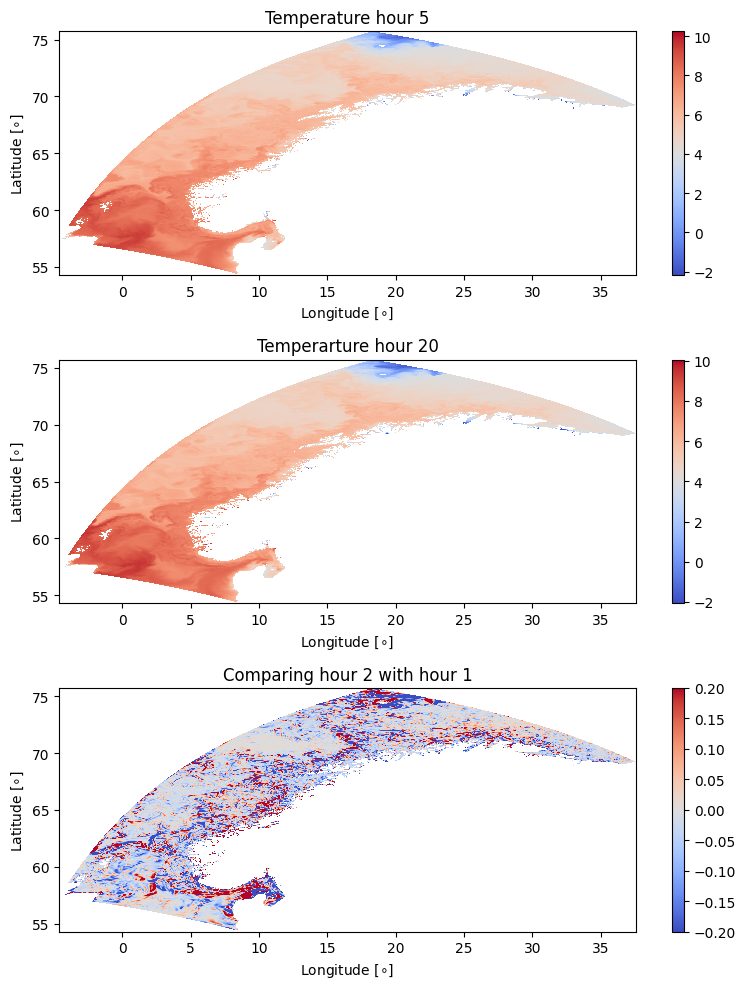

In [52]:
plotting_output_compare(lon,lat, temperature[6,:,:], temperature[20,:,:], title_1 = "Temperature hour 5", title_2 = "Temperarture hour 20", title_3="Comparing hour 2 with hour 1")

<function __main__.plotting_output_compare(longitude, latitude, variable_1, variable_2, title_1, title_2, title_3)>

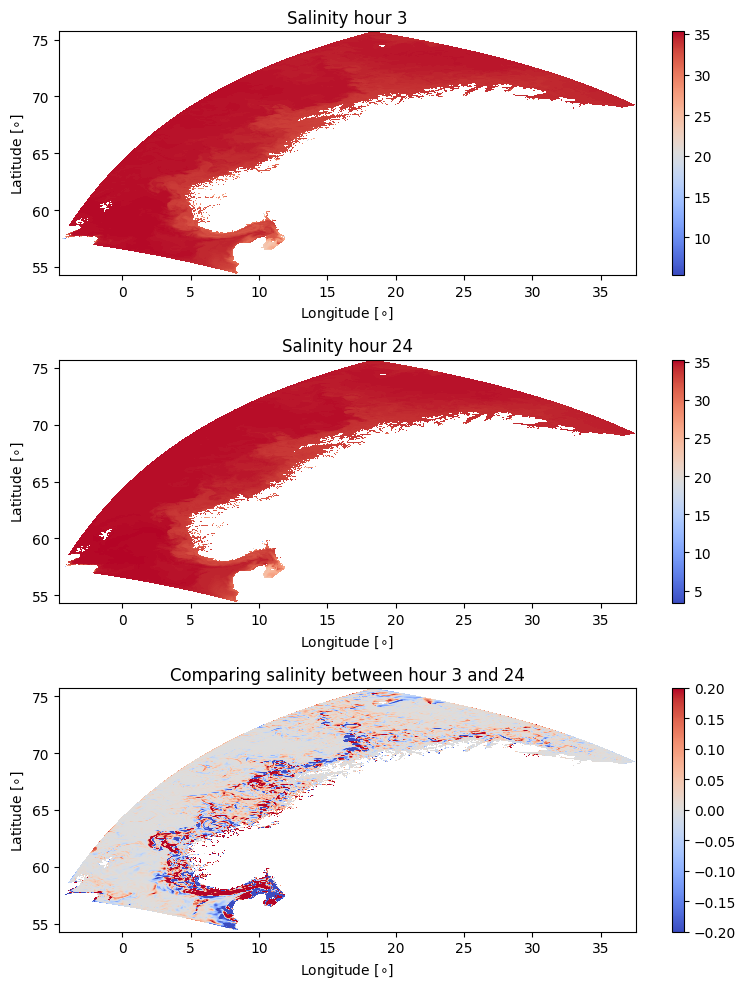

In [53]:
plotting_output_compare(lon, lat, salinity[2,:,:], salinity[23,:,:], title_1="Salinity hour 3", title_2="Salinity hour 24", title_3="Comparing salinity between hour 3 and 24")

In [40]:
#Downloading the dataset for temperatures only 

#Selecting a year
year = 2024
file = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{year}/norkyst800-{year}0101.nc'

#Download of the dataset
ds_temp = xr.open_dataset(file)["temperature"]
ds_temp.head()

<xarray.DataArray 'temperature' (time: 5, s_rho: 5, Y: 5, X: 5)> Size: 2kB
[625 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 40B 2024-01-01 ... 2024-01-01T04:00:00
  * s_rho    (s_rho) float64 40B -0.9799 -0.9403 -0.9014 -0.8634 -0.8261
  * X        (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y        (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
    lon      (Y, X) float64 200B ...
    lat      (Y, X) float64 200B ...
Attributes:
    units:                  Celsius
    grid:                   grid
    location:               face
    field:                  temperature, scalar, series
    grid_mapping:           projection_stere
    long_name:              Sea water potential temperature
    standard_name:          sea_water_potential_temperature
    coverage_content_type:  modelResult
    time:                   time